## 변수 별 정보

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


titanic_df.shape

In [2]:
# 데이터 칼럼 타입 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 파악

In [3]:
# Null 값 개수 확인
titanic_df['Age'].isnull().sum()

177

In [4]:
titanic_df['Cabin'].isnull().sum()

687

In [5]:
titanic_df['Embarked'].isnull().sum()

2

## 데이터 전처리 : 결측치 처리

### NULL 컬럼들에 대한 처리
- 사이킷 머신러닝 알고리즘은 Null값을 허용하지 않는다
- DataFrame()의 fillna()메서드를 사용해서
- Null값을 평균 또는 고정값으로 변경
- Age : 평균 나이로 변경
- 나머지 컬럼 : 'N'으로 변경

In [6]:
# Null처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna("N",inplace=True)
titanic_df['Embarked'].fillna("N",inplace=True)

# 모든 컬럼의 Null 값을 합산해서 Null 값이 없는지 확인
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 문자열 변수(feature) 빈도 분포 확인 : value_counts()

In [7]:
print('Sex분포: \n', titanic_df['Sex'].value_counts())
print('Cabin분포: \n', titanic_df['Cabin'].value_counts())
print('Embarked분포: \n', titanic_df['Embarked'].value_counts())

Sex분포: 
 male      577
female    314
Name: Sex, dtype: int64
Cabin분포: 
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
C22 C26          3
              ... 
D46              1
C82              1
B3               1
B50              1
D48              1
Name: Cabin, Length: 148, dtype: int64
Embarked분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


### 문자열 변수 Cabin값 변경

In [8]:
# cabin의 첫 번째 문자만 추출해서 표기
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

# 선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### 성별에 따른 생존자수 분포(EDA)
머신러닝 알고리즘 적용해서 예측 수행 전에 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별이 생존 확률에 어떤 영향을 미쳤는지 확인
- 성별에 따른 생존자 수 비교

In [9]:
# 성별 분포 확인
titanic_df.groupby('Sex')['Sex'].count()

# 생존 분포 확인
titanic_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [10]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

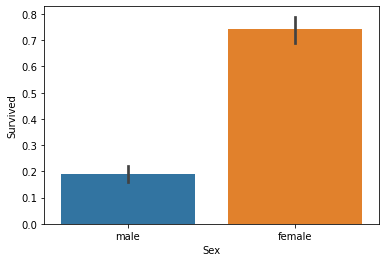

In [11]:
# 성별 생존자 : 막대 그래프(barplot)
sns.barplot(data=titanic_df,x='Sex',y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

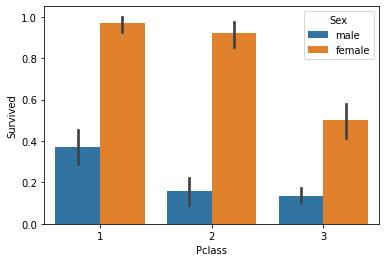

In [12]:
# 객실 등급별 / 성별생존확률
sns.barplot(data=titanic_df,x='Pclass', y= 'Survived',hue='Sex')

### 데이터 전처리 : 구간화(binning)
#### 연령대에 따른 생존자수 분포
- 연령은 수치형 변수이므로 범주형으로 구간화

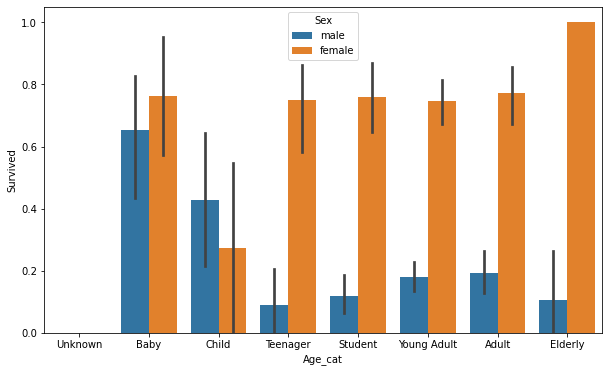

In [13]:
def get_category(age):
    cat = ''
    if age <= -1 : cat='Unknown'
    elif age <=5:cat = 'Baby'
    elif age <=12:cat = 'Child'
    elif age <=18:cat = 'Teenager'
    elif age <=25:cat = 'Student'
    elif age <=35:cat = 'Young Adult'
    elif age <=60:cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

plt.figure(figsize=(10,6))

group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

### 데이터 전처리 : 인코딩

#### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
- 인코딩 : 사이킷런의 labelEncoder 클래스 이용해서 레이블 인코딩 적용
- 0~(카테고리 유형수 -1) 숫자 값으로 변환
- fit()/transform()메서드 사용

In [14]:
from sklearn import preprocessing

# 레이블 인코딩 함수
def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


### 데이터 전처리 : 삭제
- PassengerId,Name,Ticket 변수 삭제
- drop(labels=None, axis=0, inplace=False)함수 사용

In [15]:
# 불필요한 변수 제거 drop()함수 : PassengerId,Name,Ticket
titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


---

#### * <b>지금까지 가공한내용을 정리하고 함수로 작성(재사용 가능)</b>


In [22]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

---

## <b>생존자 예측 프로세스</b>
#### 1단계. 데이터 로딩
- 피처 데이터셋, 레이블 데이터셋 추출

In [23]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived',axis=1)

#### 2단계. 데이터 천처리
- 피처 데이터 세트에 transform_feature()를 적용해 데이터 가공

In [24]:
x_titanic_df = transform_features(x_titanic_df)
x_titanic_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


#### 3단계. Data Split: 학습데이터/테스트데이터

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_titanic_df,
                                                   y_titanic_df,
                                                   test_size=0.2,
                                                   random_state=11)

#### 4단계. 분류 알고리즘을 적용한 학습/예측/평가
- 3개의 ML알고리즘 수행
    - 결정 트리, 랜덤 포레스트, 로지스틱 회귀(분류)
- 이 3개의 알고리즘으로 예측 수행하고
- 교차 검증으로 평가

사이킷런 클래스
- 결정 트리 : Decision TreeClassifier
- 랜덤 포레스트 : RandomForestClassifier
- 로지스틱 회귀 : LogisticRegression

train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로
- 머신러닝 모델을 학습하고(fit), 예측 수행(predic)
- 예측 성능 평가 : 정확도(accuracy_score()사용)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# 평가 지표
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱회귀를 위한 estimator 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# 결정트리 학습/예측/평가
dt_clf.fit(X_train,y_train) # 학습
dt_pred = dt_clf.predict(X_test) # 예측
# 실제값과 예측값 비교
print('결정트리의 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# 랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train,y_train) # 학습
rf_pred = rf_clf.predict(X_test) # 예측
# 실제값과 예측값 비교
print('랜덤포레스트의 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# 로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train,y_train) # 학습
lr_pred = lr_clf.predict(X_test) # 예측
# 실제값과 예측값 비교
print('로지스틱회귀의 정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

결정트리의 정확도:0.7877
랜덤포레스트의 정확도:0.8547
로지스틱회귀의 정확도:0.8492


C:\ananconda\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 5단계. 교차 검증을 통한 모델 성능 향상
: 결정 트리 모델 좀 더 평가
- 사이킷런 model_selection 패키지의
    - KFold클래스, cross_val_score(),GridSearchCV클래스 사용

In [49]:
x_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [57]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
import numpy as np

# KFold를 이용해 교차 검증 수행
def exec_Kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]
        
    for iter_n, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        X_train, X_test = x_titanic_df.iloc[train_index], x_titanic_df.iloc[test_index]
        y_train, y_test = y_titanic_df.iloc[train_index], y_titanic_df.iloc[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test,pred)
        scores.append(accuracy)
        print('교차검증 %d : %f' %(iter_n, accuracy))
    
    mean_accuracy = np.mean(scores)
    print('\n평균 정확도 : %f'% mean_accuracy)

exec_Kfold(dt_clf, folds=5)

교차검증 0 : 0.754190
교차검증 1 : 0.780899
교차검증 2 : 0.786517
교차검증 3 : 0.769663
교차검증 4 : 0.820225

평균 정확도 : 0.782299


In [53]:
x_titanic_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3


In [54]:
x_titanic_df.values[0]

array([ 3.  ,  1.  , 22.  ,  1.  ,  0.  ,  7.25,  7.  ,  3.  ])

In [60]:
# cross_val_score()를 이용해 교차 검증 수행

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df,cv=5)
for iter_n, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_n,accuracy))

print('\n평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427

평균 정확도 : 0.7879


### 6단계. 하이퍼파라미터 튜닝

In [62]:
# 1. 하이퍼 파라미터 설정
parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ',grid_dclf.best_params_)
print('GridSearchCV 최적 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최적 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
